<a href="https://colab.research.google.com/github/AmirHosseinAlikhahMishamandani/SQLZoo/blob/main/SQLZoo_SELECT_from_NOBEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQLZoo - SELECT from NOBEL

You need to go to this [Github repo](https://github.com/AmirHosseinAlikhahMishamandani/Nobel-Prize-Laureate-API-V1) to get the code to use the v1 API or download the already available csv file.

Data Accessed: Thursday, January 18, 2024

# Initialization

In [1]:
import sqlite3
from sqlite3 import Error
import csv
import pandas as pd

class DBsqlite():
    def create_connection(self, path):
        connection = None
        try:
            connection = sqlite3.connect(path)
            connection.text_factory = str
        except Error as e:
            print("Error occurred: " + str(e))

        return connection

    def execute_query(self, connection, query):
        cursor = connection.cursor()
        try:
            if query == "":
                return "Query Blank"
            else:
                cursor.execute(query)
                connection.commit()
                return "Query executed successfully"
        except Error as e:
            return "Error occurred: " + str(e)

In [2]:
db = DBsqlite()


try:
  conn = db.create_connection("SQLZoo")
except:
  print("Database Creation Error")


cursor = conn.cursor()

## Creating TABLE world



In [3]:
cursor.execute("CREATE TABLE IF NOT EXISTS nobel (year INTEGER, subject TEXT, winner REAL);")

## Loading the csv file into a TABLE



In [4]:
# Open the CSV file for reading
with open('nobel_prize_data.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)

    # Skip the header row
    next(csv_reader)

    # Insert data from the CSV file into the SQLite table
    for row in csv_reader:
        year = int(row[0])
        category = row[1]
        full_name = row[6]

        cursor.execute("INSERT INTO nobel (year, subject, winner) VALUES (?, ?, ?)", (year, category, full_name))

### Printing the entire TABLE

In [5]:
try:
    cursor.execute("SELECT * FROM nobel;")
    results = cursor.fetchall()
    if results:
        print("Contents of the 'nobel' table:")
        df = pd.DataFrame(results, columns=[desc[0] for desc in cursor.description])
        print(df)
    else:
        print("The table is empty.")
except Exception as e:
    print("An error occurred:", e)

Contents of the 'nobel' table:
     year     subject                  winner
0    2023   chemistry          Moungi Bawendi
1    2023   chemistry              Louis Brus
2    2023   chemistry         Aleksey Yekimov
3    2023   economics          Claudia Goldin
4    2023  literature               Jon Fosse
..    ...         ...                     ...
995  1901  literature         Sully Prudhomme
996  1901       peace            Henry Dunant
997  1901       peace          Frédéric Passy
998  1901     physics  Wilhelm Conrad Röntgen
999  1901    medicine        Emil von Behring

[1000 rows x 3 columns]


## 1. Winners from 1950

Change the query shown so that it displays Nobel prizes for 1950.

In [9]:
try:
    cursor.execute("SELECT year, subject, winner FROM nobel WHERE year = 1950;")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Year", "Subject", "Nobel Laureates"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

   Year     Subject    Nobel Laureates
0  1950   chemistry         Otto Diels
1  1950   chemistry         Kurt Alder
2  1950  literature   Bertrand Russell
3  1950       peace       Ralph Bunche
4  1950     physics       Cecil Powell
5  1950    medicine  Edward C. Kendall
6  1950    medicine  Tadeus Reichstein
7  1950    medicine    Philip S. Hench


## 2. 1962 Literature

Show who won the 1962 prize for literature.

In [11]:
try:
    cursor.execute("SELECT winner FROM nobel WHERE year = 1962 AND subject = 'literature';")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Nobel Laureates"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

  Nobel Laureates
0  John Steinbeck


## 3. Albert Einstein

Show the year and subject that won 'Albert Einstein' his prize.



In [12]:
try:
    cursor.execute("SELECT year, subject FROM nobel WHERE winner = 'Albert Einstein';")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["year", 'subject'])
    print(df)
except Exception as e:
    print("An error occurred:", e)

   year  subject
0  1921  physics


## 4. Recent Peace Prizes

Give the name of the 'peace' winners since the year 2000, including 2000.

In [13]:
try:
    cursor.execute("SELECT winner FROM nobel WHERE year >= 2000 AND subject = 'peace';")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Nobel Laureates"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

                                      Nobel Laureates
0                                    Narges Mohammadi
1                                     Ales Bialiatski
2                                           Memorial 
3                         Center for Civil Liberties 
4                                         Maria Ressa
5                                      Dmitry Muratov
6                               World Food Programme 
7                                      Abiy Ahmed Ali
8                                       Denis Mukwege
9                                         Nadia Murad
10  International Campaign to Abolish Nuclear Weap...
11                                 Juan Manuel Santos
12                         National Dialogue Quartet 
13                                  Kailash Satyarthi
14                                   Malala Yousafzai
15  Organisation for the Prohibition of Chemical W...
16                                    European Union 
17                          

## 5. Literature in the 1980's

Show all details (yr, subject, winner) of the literature prize winners for 1980 to 1989 inclusive.

In [14]:
try:
    cursor.execute("SELECT year, subject, winner FROM nobel WHERE year >= 1980 AND year <= 1989 AND subject = 'literature';")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Year", "Subject", "Nobel Laureates"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

   Year     Subject         Nobel Laureates
0  1989  literature        Camilo José Cela
1  1988  literature          Naguib Mahfouz
2  1987  literature          Joseph Brodsky
3  1986  literature            Wole Soyinka
4  1985  literature            Claude Simon
5  1984  literature        Jaroslav Seifert
6  1983  literature         William Golding
7  1982  literature  Gabriel García Márquez
8  1981  literature           Elias Canetti
9  1980  literature          Czeslaw Milosz


## 6. Only Presidents

Show all details of the presidential winners:

* Theodore Roosevelt
* Thomas Woodrow Wilson
* Jimmy Carter
* Barack Obama

In [15]:
try:
    cursor.execute("SELECT * FROM nobel WHERE winner IN ('Theodore Roosevelt', 'Thomas Woodrow Wilson', 'Jimmy Carter', 'Barack Obama');")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Year", "Subject", "Nobel Laureates"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

   Year Subject     Nobel Laureates
0  2009   peace        Barack Obama
1  2002   peace        Jimmy Carter
2  1906   peace  Theodore Roosevelt


## 7. John

Show the winners with first name John

In [16]:
try:
    cursor.execute("SELECT winner FROM nobel WHERE winner LIKE 'John%';")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Nobel Laureates"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

      Nobel Laureates
0        John Clauser
1     John Goodenough
2        John O'Keefe
3      John C. Mather
4        John L. Hall
5        John B. Fenn
6     John E. Sulston
7          John Pople
8           John Hume
9      John E. Walker
10   John C. Harsanyi
11   John F. Nash Jr.
12    John C. Polanyi
13       John R. Vane
14  John H. Van Vleck
15     John Cornforth
16      John R. Hicks
17       John Bardeen
18    John C. Kendrew
19     John Steinbeck
20       John Bardeen
21     John F. Enders
22     John Cockcroft
23      John Boyd Orr
24   John H. Northrop
25       John R. Mott
26    John Galsworthy
27       John Macleod


## 8. Chemistry and Physics from different years

Show the year, subject, and name of physics winners for 1980 together with the chemistry winners for 1984.

In [18]:
try:
    cursor.execute("SELECT * FROM nobel WHERE (year = 1980 AND subject = 'physics') OR (year = 1984 AND subject = 'chemistry');")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Year", "Subject", "Nobel Laureates"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

   Year    Subject   Nobel Laureates
0  1984  chemistry  Bruce Merrifield
1  1980    physics      James Cronin
2  1980    physics         Val Fitch


## 9. Exclude Chemists and Medics

Show the year, subject, and name of winners for 1980 excluding chemistry and medicine

In [20]:
try:
    cursor.execute("SELECT * FROM nobel WHERE year = 1980 AND NOT (subject = 'chemistry' OR subject = 'medicine');")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Year", "Subject", "Nobel Laureates"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

   Year     Subject        Nobel Laureates
0  1980   economics      Lawrence R. Klein
1  1980  literature         Czeslaw Milosz
2  1980       peace  Adolfo Pérez Esquivel
3  1980     physics           James Cronin
4  1980     physics              Val Fitch


## 10. Early Medicine, Late Literature

Show year, subject, and name of people who won a 'Medicine' prize in an early year (before 1910, not including 1910) together with winners of a 'Literature' prize in a later year (after 2004, including 2004)

In [22]:
try:
    cursor.execute("SELECT * FROM nobel WHERE (year < 1910 AND subject = 'medicine') OR (year >= 2004 AND subject = 'literature');")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Year", "Subject", "Nobel Laureates"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

    Year     Subject               Nobel Laureates
0   2023  literature                     Jon Fosse
1   2022  literature                  Annie Ernaux
2   2021  literature             Abdulrazak Gurnah
3   2020  literature                  Louise Glück
4   2019  literature                  Peter Handke
5   2018  literature                Olga Tokarczuk
6   2017  literature                Kazuo Ishiguro
7   2016  literature                     Bob Dylan
8   2015  literature           Svetlana Alexievich
9   2014  literature               Patrick Modiano
10  2013  literature                   Alice Munro
11  2012  literature                        Mo Yan
12  2011  literature             Tomas Tranströmer
13  2010  literature            Mario Vargas Llosa
14  2009  literature                  Herta Müller
15  2008  literature  Jean-Marie Gustave Le Clézio
16  2007  literature                 Doris Lessing
17  2006  literature                   Orhan Pamuk
18  2005  literature           

## 11. Umlaut

Find all details of the prize won by PETER GRÜNBERG

In [41]:
try:
    cursor.execute("SELECT * FROM nobel WHERE winner ='Peter Grünberg';")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Year", "Subject", "Nobel Laureates"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

   Year  Subject Nobel Laureates
0  2007  physics  Peter Grünberg


## 12. Apostrophe

Find all details of the prize won by EUGENE O'NEILL

In [43]:
try:
    cursor.execute("SELECT * FROM nobel WHERE winner = 'Eugene O''Neill';")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Year", "Subject", "Nobel Laureates"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

   Year     Subject Nobel Laureates
0  1936  literature  Eugene O'Neill


## 13. Knights of the realm

Knights in order

List the winners, year and subject where the winner starts with Sir. Show the the most recent first, then by name order.

In [50]:
try:
    cursor.execute("SELECT winner, year, subject FROM nobel WHERE winner LIKE 'Sir%' ORDER BY year DESC, winner;")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Nobel Laureates", "Year", "Subject"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

                     Nobel Laureates  Year    Subject
0              Sir Gregory P. Winter  2018  chemistry
1             Sir J. Fraser Stoddart  2016  chemistry
2                 Sir John B. Gurdon  2012   medicine
3                Sir Martin J. Evans  2007   medicine
4                Sir Peter Mansfield  2003   medicine
5                     Sir Paul Nurse  2001   medicine
6                   Sir Harold Kroto  1996  chemistry
7                 Sir James W. Black  1988   medicine
8                   Sir Arthur Lewis  1979  economics
9                 Sir Nevill F. Mott  1977    physics
10                  Sir Bernard Katz  1970   medicine
11                   Sir John Eccles  1963   medicine
12       Sir Frank Macfarlane Burnet  1960   medicine
13             Sir Cyril Hinshelwood  1956  chemistry
14               Sir Robert Robinson  1947  chemistry
15             Sir Alexander Fleming  1945   medicine
16                 Sir Howard Florey  1945   medicine
17                    Sir He

## 14. Chemistry and Physics last

The expression subject IN ('chemistry','physics') can be used as a value - it will be 0 or 1.

Show the 1984 winners and subject ordered by subject and winner name; but list chemistry and physics last.

In [53]:
try:
    cursor.execute("SELECT winner, subject FROM nobel WHERE year = 1984 ORDER BY CASE WHEN subject IN ('chemistry', 'physics') THEN 1 ELSE 0 END, subject, winner;")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Nobel Laureates", "Subject"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

       Nobel Laureates     Subject
0        Richard Stone   economics
1     Jaroslav Seifert  literature
2       César Milstein    medicine
3  Georges J.F. Köhler    medicine
4       Niels K. Jerne    medicine
5         Desmond Tutu       peace
6     Bruce Merrifield   chemistry
7         Carlo Rubbia     physics
8   Simon van der Meer     physics


# Nobel Quiz

## 1. Pick the code which shows the name of winner's names beginning with C and ending in n


In [54]:
try:
    cursor.execute("SELECT winner FROM nobel WHERE winner LIKE 'C%' OR '%n';")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Nobel Laureates"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

                Nobel Laureates
0                Claudia Goldin
1              Carolyn Bertozzi
2   Center for Civil Liberties 
3                  Charles Rice
4           Christopher A. Sims
5     Christopher A. Pissarides
6                Charles K. Kao
7              Carol W. Greider
8                Craig C. Mello
9            Clive W.J. Granger
10                  Carl Wieman
11       Claude Cohen-Tannoudji
12   Carlos Filipe Ximenes Belo
13  Christiane Nüsslein-Volhard
14            Clifford G. Shull
15             Camilo José Cela
16          Charles J. Pedersen
17                 Claude Simon
18                 Carlo Rubbia
19               César Milstein
20               Czeslaw Milosz
21            Christian de Duve
22           Christian Anfinsen
23           Charles B. Huggins
24            Charles H. Townes
25               Chen Ning Yang
26                 Cecil Powell
27                    Carl Cori
28                 Cordell Hull
29            Corneille Heymans
30      

## 2. Select the code that shows how many Chemistry awards were given between 1950 and 1960


In [59]:
try:
    cursor.execute("SELECT COUNT(subject) FROM nobel WHERE subject = 'chemistry' AND year BETWEEN 1950 AND 1960;")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["# Chemistry Rewards"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

   # Chemistry Rewards
0                   15


## 3. Pick the code that shows the amount of years where no Medicine awards were given


In [60]:
try:
    cursor.execute("SELECT COUNT(subject) FROM nobel WHERE year NOT IN (SELECT DISTINCT year FROM nobel WHERE subject = 'medicine');")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["# No years with Medicine Rewards"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

   # No Medicine Rewards
0                     22


## 4. Select the result that would be obtained from the following code:



```
SELECT subject, winner FROM nobel WHERE winner LIKE 'Sir%' AND yr LIKE '196%'
```



In [62]:
try:
    cursor.execute("SELECT subject, winner FROM nobel WHERE winner LIKE 'Sir%' AND year LIKE '196%';")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Subject", "Nobel Laureates"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

    Subject              Nobel Laureates
0  medicine              Sir John Eccles
1  medicine  Sir Frank Macfarlane Burnet


## 5. Select the code which would show the year when neither a Physics or Chemistry award was given


In [65]:
try:
    cursor.execute("SELECT year FROM nobel WHERE year NOT IN (SELECT DISTINCT year FROM nobel WHERE subject IN ('physics', 'chemistry'));")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["years without physics or chemistry award"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

   years without physics or chemistry award
0                                      1916


## 6. Select the code which shows the years when a Medicine award was given but no Peace or Literature award was


In [71]:
try:
    cursor.execute("SELECT DISTINCT year FROM nobel WHERE subject='medicine' AND year NOT IN(SELECT year FROM nobel WHERE subject='literature') AND year NOT IN (SELECT year FROM nobel WHERE subject='peace');")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["years with medicine without peace or literature"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

   years with medicine without peace or literature
0                                             1943
1                                             1914


## 7. Pick the result that would be obtained from the following code:


```
SELECT subject, COUNT(subject)
FROM nobel
WHERE yr ='1960'
GROUP BY subject
```

In [73]:
try:
    cursor.execute("SELECT subject, COUNT(subject) FROM nobel WHERE year = '1960' GROUP BY subject;")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["subject", "# subject"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

      subject  # subject
0   chemistry          1
1  literature          1
2    medicine          2
3       peace          1
4     physics          1


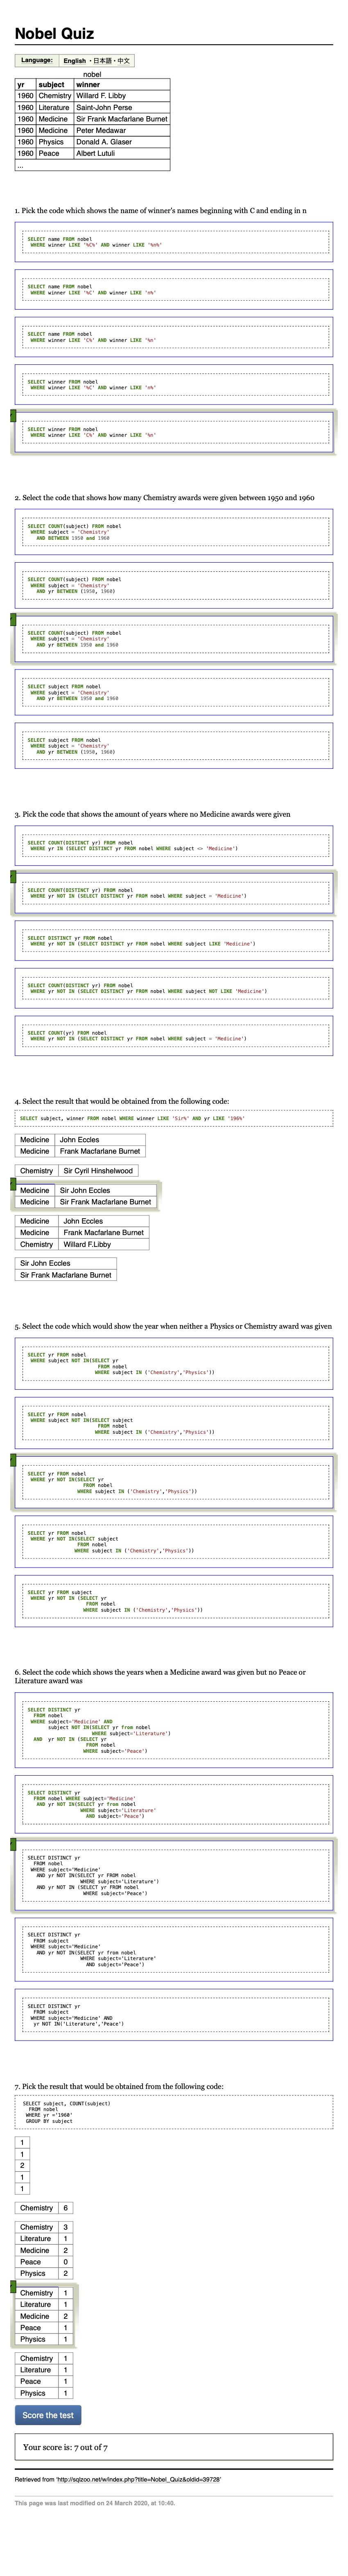